In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import os
import sys
from scipy.stats import norm
from sklearn import preprocessing

debug = True

In [2]:
def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    
    X = x-mean
    X=X/std
    
    return X

# Part 1A - batch gradient descent

In [3]:
def make_batch(X,Y,batch_size):

    data_join = np.hstack((X,Y))
    
    # Shuffle the data
    np.random.shuffle(data_join)
    
    #print(data_join)
    
    # Find the number of batch possible
    batch_n = data_join.shape[0]//batch_size
    
    # Store each batch
    batch = []
    
    i=0
    for i in range(batch_n):
        tmp = data_join[i * batch_size : (i+1) * batch_size, :]
        X_new = tmp[:,[0,1]]
        Y_new = tmp[:,[2]]
        batch.append((X_new,Y_new))
        
    # If data_join is not proper multiple of batch_size then make a batch of the remaining data
    
    if(data_join.shape[0]%batch_size!=0):
        tmp = data_join[(i+1) * batch_size : , :]
        X_new = tmp[:,[0,1]]
        Y_new = tmp[:,[2]]
        batch.append((X_new,Y_new))
    
    return batch


In [4]:
def find_hypothesis(X,theta):
    return np.dot(X,theta)

def find_J_theta(X,Y,theta):
    hypothesis = find_hypothesis(X,theta)
    difference =  Y - hypothesis
    sum_sq = np.dot(difference.transpose(),difference)
    return sum_sq[0,0]/(2*X.shape[0])

def gradient(X,Y,theta):
    term1 = np.dot(X.transpose(),X)
    term2 = np.dot(term1,theta)
    term3 = np.dot(X.transpose(),Y)
    return(term2-term3)
    

def batch_SGD(X,Y, learning_rate=0.025, batch_size=10, error_threshold = 0.0000001):
    
    # theta shape is number of unknown parameters * 1 (2*1)
    theta = np.zeros((X.shape[1],1)) 
    
    list_error = []
    list_theta = []
    
    list_theta.append(theta)
    
    # Finding the error
    J_theta = find_J_theta(X,Y,theta)
    list_error.append(J_theta)
    
    epoch = 0
    while(True):
        epoch+=1
        batches =  make_batch(X,Y,batch_size)
        
        for X_batch, Y_batch  in batches:
            theta = theta - learning_rate * gradient(X_batch, Y_batch, theta)  
        
        J_theta_new = find_J_theta(X,Y,theta)
            
        list_error.append(J_theta_new)
        list_theta.append(theta)
        
        if(abs(J_theta_new-J_theta)<error_threshold or epoch>1000000):
            return theta,list_error, list_theta,epoch
        J_theta = J_theta_new.copy()   
            
            
            
def SGD(X,Y, learning_rate=0.1, error_threshold = 0.0000001):
    
    # theta shape is number of unknown parameters * 1 (2*1)
    theta = np.zeros((X.shape[1],1)) 
    
    list_error = []
    list_theta = []
    
    list_theta.append(theta)
    
    # Finding the error
    J_theta = find_J_theta(X,Y,theta)
    list_error.append(J_theta)
    
    epoch = 0
    while(True):
        epoch+=1
        theta = theta - learning_rate * gradient(X, Y, theta)
        J_theta_new = find_J_theta(X,Y,theta)
            
        list_error.append(J_theta_new)
        list_theta.append(theta)
        
        if(abs(J_theta_new-J_theta)<error_threshold or epoch>1000000):
            return theta,list_error, list_theta,epoch
        J_theta = J_theta_new.copy()
            

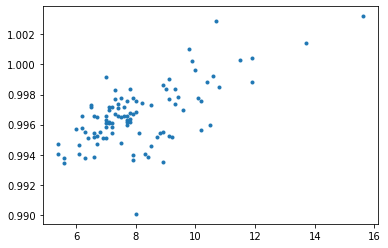

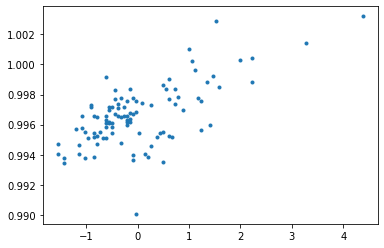

In [5]:
X = genfromtxt('data/q1/linearX.csv', delimiter=',')
Y = genfromtxt('data/q1/linearY.csv',delimiter=',')

X_normal = normalize(X)
#Y_normal = normalize(Y)
Y_normal = Y.copy()

if(False):
    print(X)
    print(X_normal)
    
    print(Y)
    print(Y_normal)

learning_rate = 0.001
time_gap = 0.2

plt.scatter(X,Y, marker = '.')
plt.show()

plt.scatter(X_normal,Y_normal,marker='.')
plt.show()

X_normal=X_normal.reshape(-1,1)
Y_normal=Y_normal.reshape(-1,1)


# Adding the intercept
X_normal=np.hstack((X_normal,np.ones((X_normal.shape[0],1))))


In [7]:
theta, lst_error,lst_theta,epoch = batch_SGD(X_normal, Y_normal,batch_size=10)
print("Number of epochs :",epoch)
print("Final Theta :\n",theta)

Number of epochs : 4
Final Theta :
 [[0.0014833 ]
 [0.99674756]]


# Part 1B - Plot hypothesis

<IPython.core.display.Javascript object>


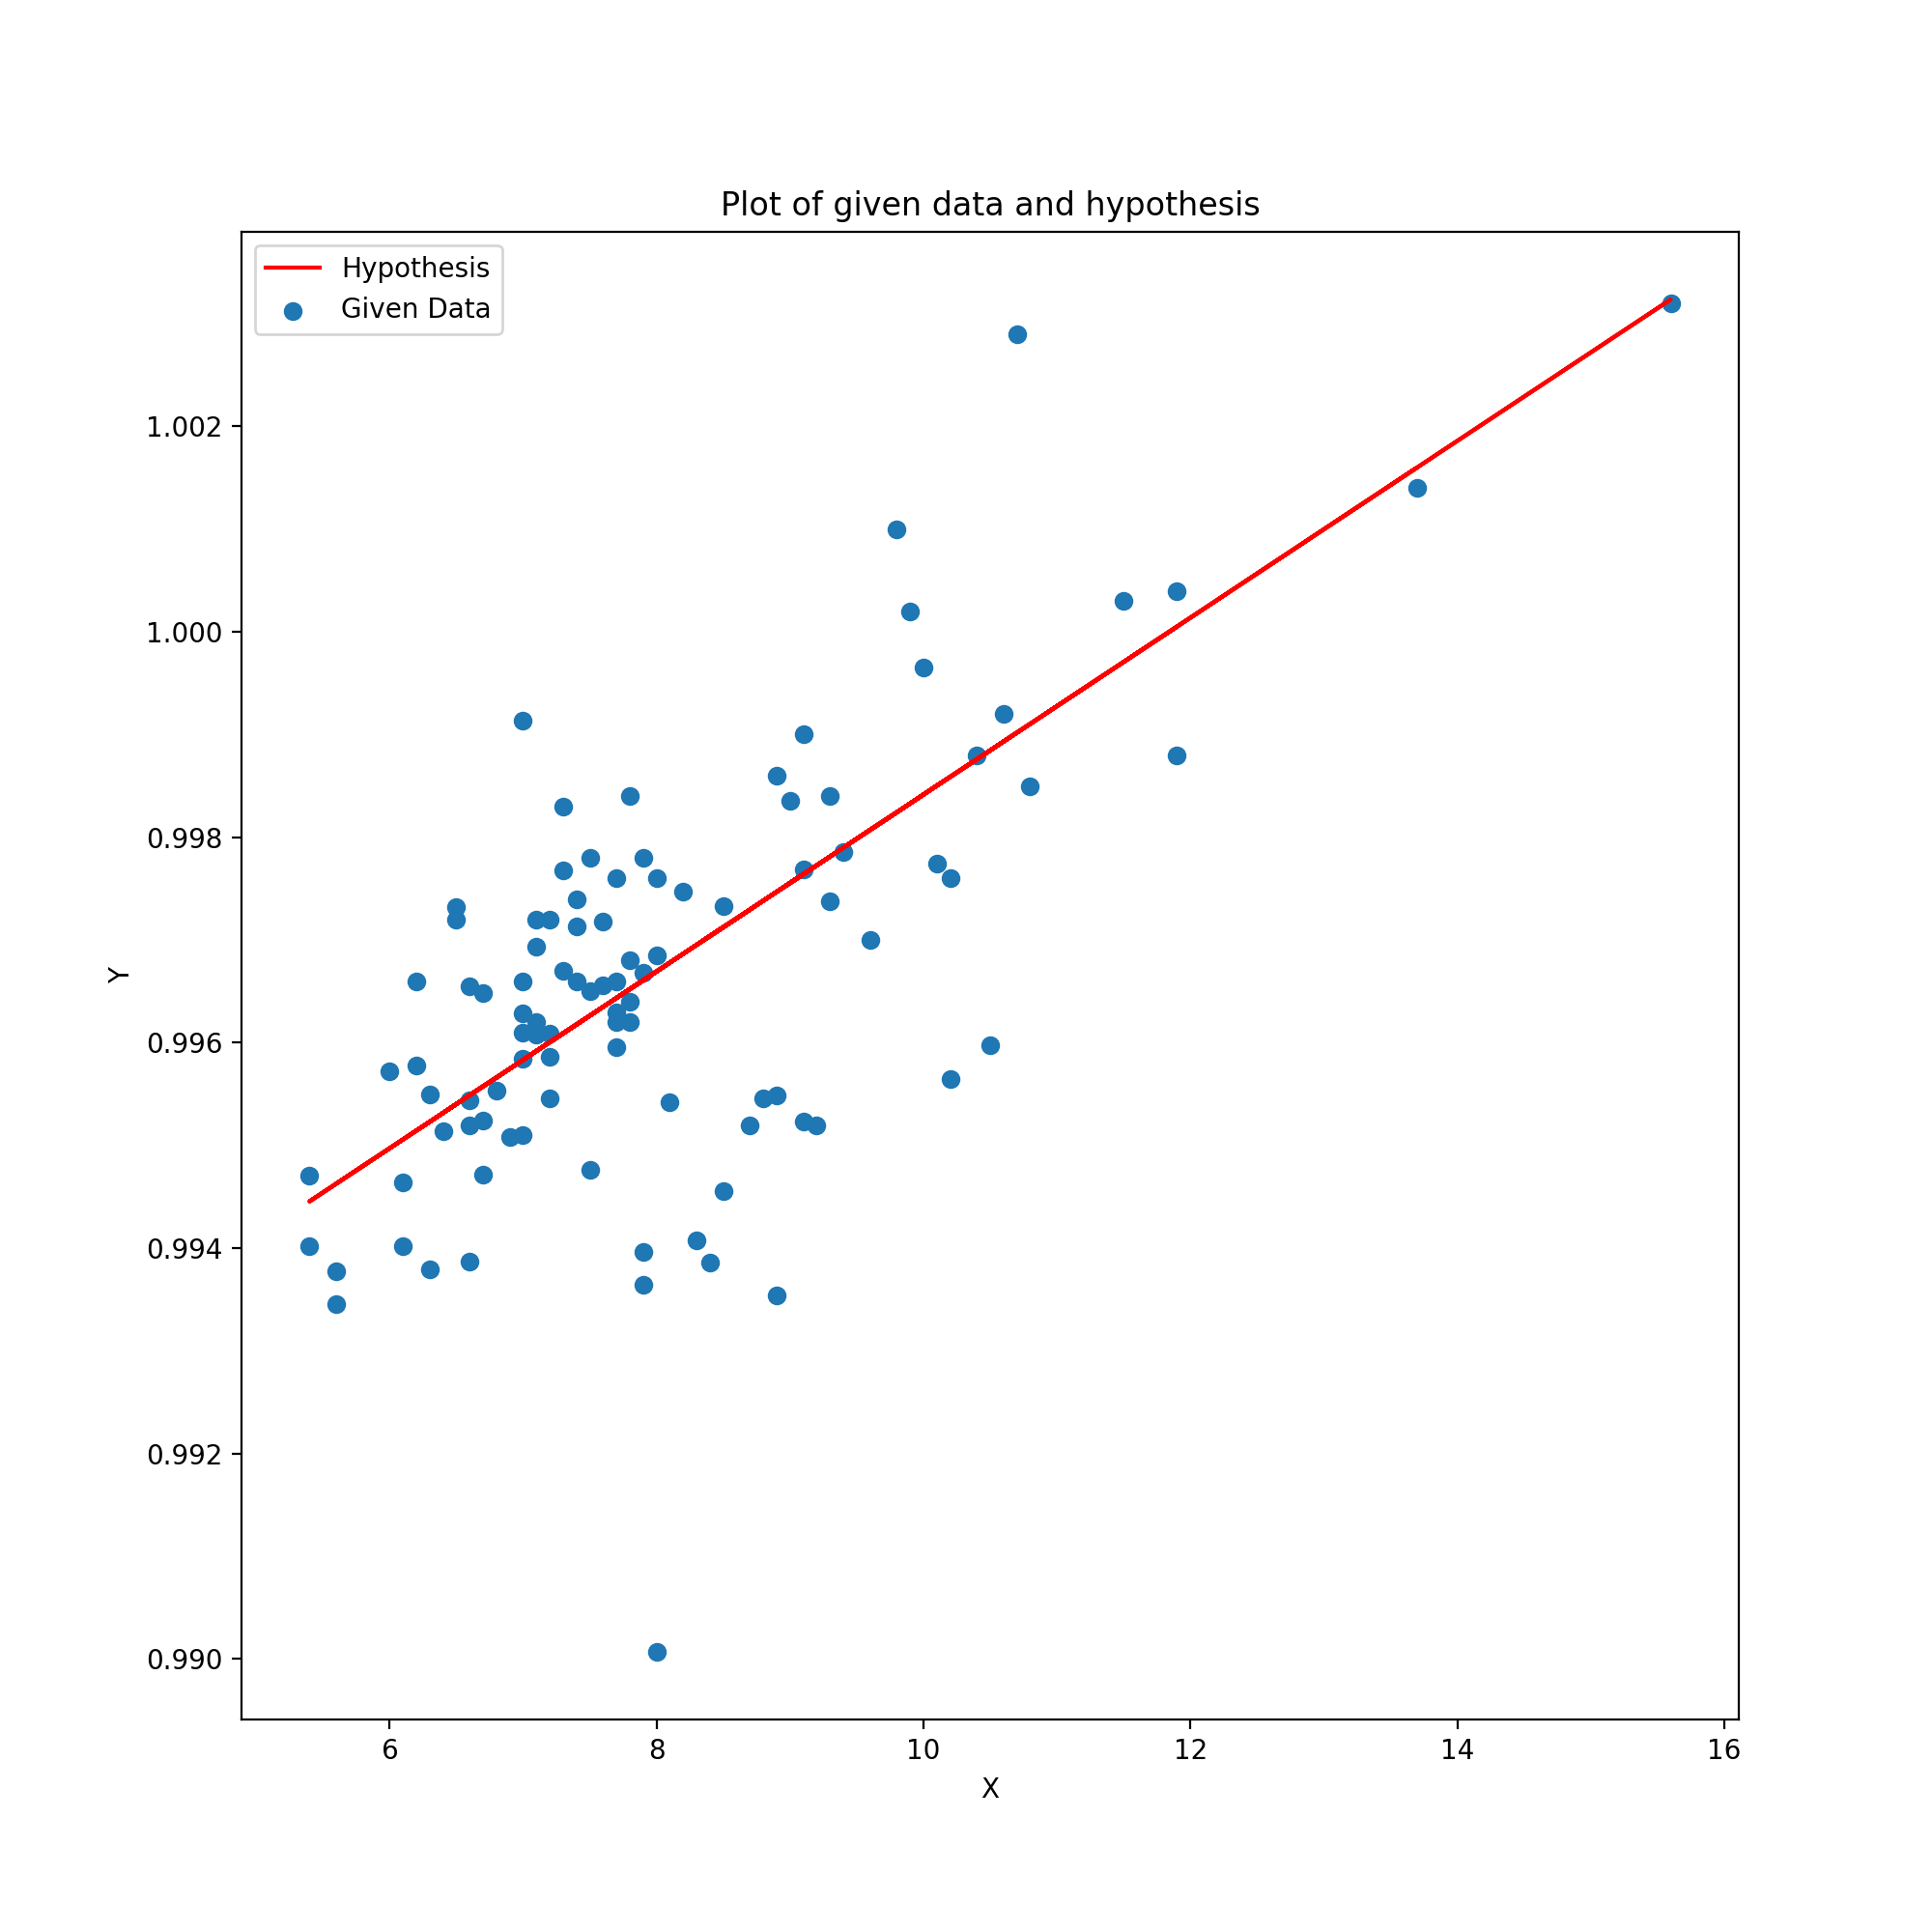

In [8]:
%matplotlib notebook
# plotting
plt.figure(figsize=(10,10))
plt.scatter(X, Y,label = 'Given Data')

Y_p = []
for x in X_normal:
    Y_p.append(find_hypothesis(x, theta)[0])

plt.plot(X, Y_p, '-r',label = 'Hypothesis')
plt.legend(loc='upper left')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Plot of given data and hypothesis")
plt.savefig('output/Ques1(b).png')

# Part 1C - mesh diagram

<IPython.core.display.Javascript object>


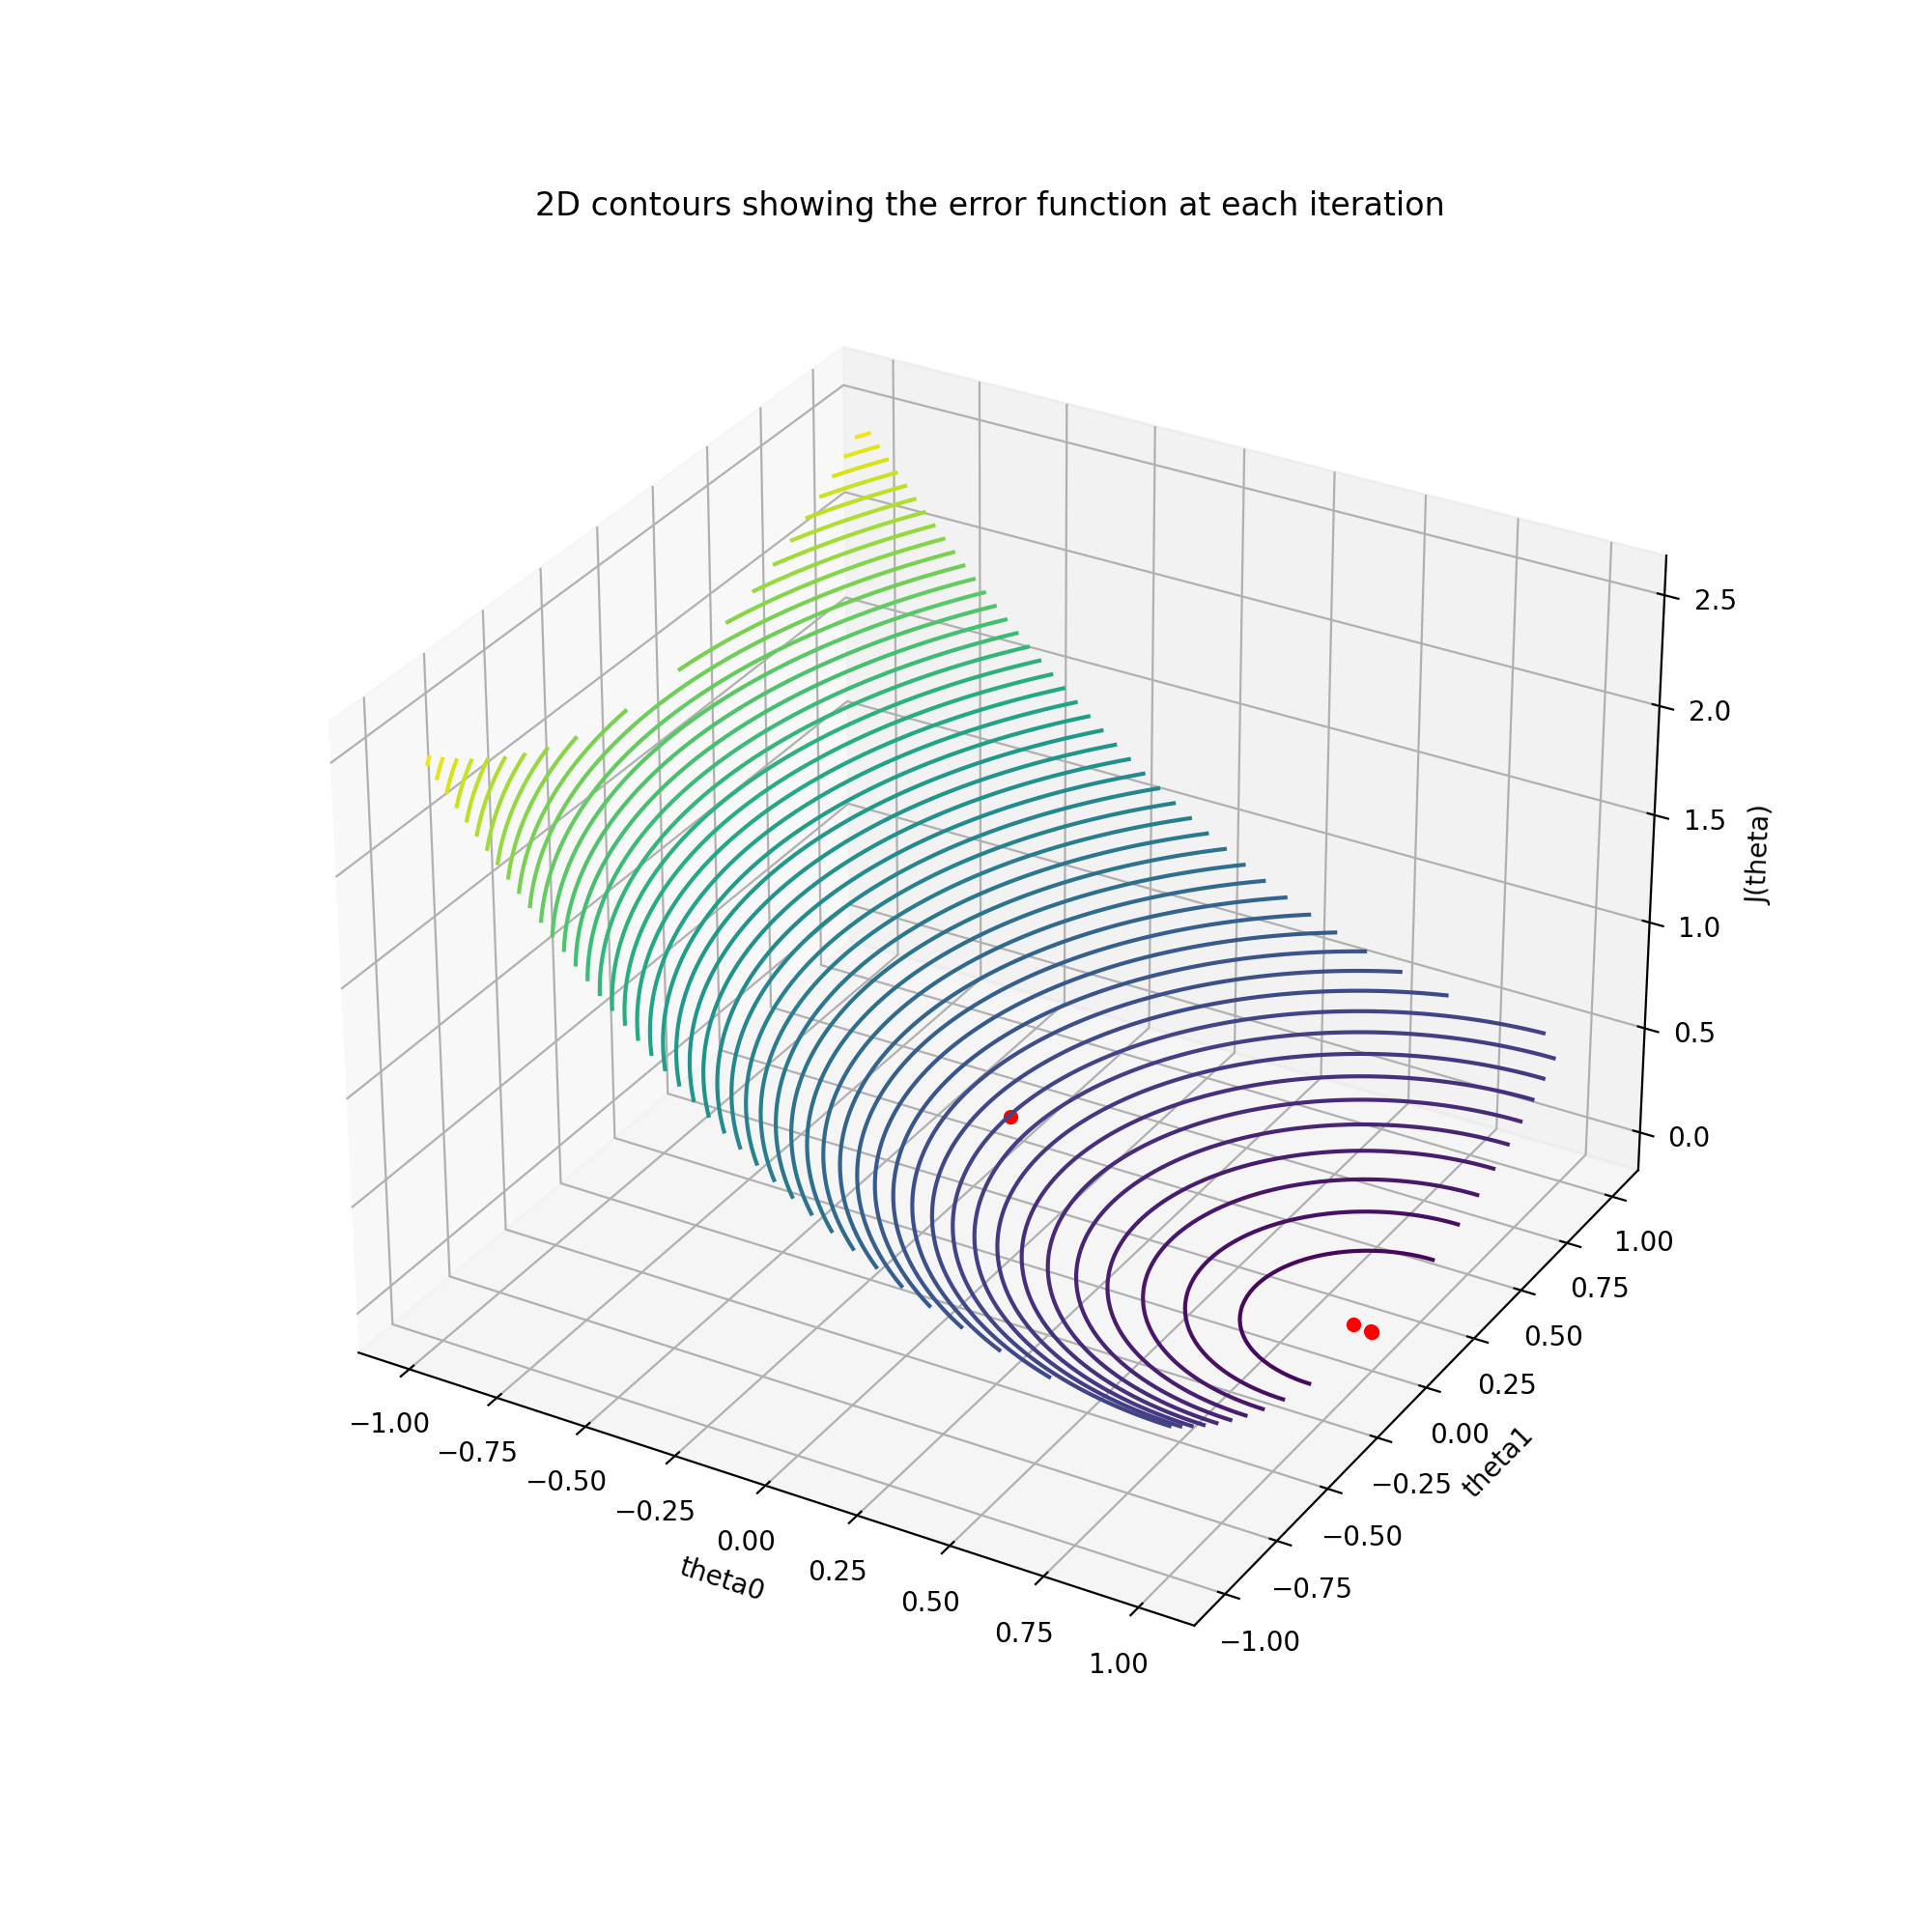

In [9]:

# evenly spaced sequence in a specified interval
X_axis = np.linspace(-1,1,100)
Y_axis = np.linspace(-1,1,100)

X1, Y1 = np.meshgrid(X_axis, Y_axis)

Z1 = np.asmatrix(np.zeros((100,100),dtype=float))

for i in range(100):
    for j in range(100):
        Z1[i,j]=find_J_theta(X_normal, Y_normal,[[X1[i][j]],[Y1[i][j]]])

Z1 = np.array(Z1)

th0 = np.zeros((len(lst_theta),1),dtype=float)

for i in range(len(lst_theta)):
    th0[i,0]=lst_theta[i][0]

    
th1 = np.zeros((len(lst_theta),1),dtype=float)
for i in range(len(lst_theta)):
    th1[i,0]=lst_theta[i][1]

    
plt.figure(figsize=(10,10))

plot3d = plt.axes(projection='3d')
plot3d.contour3D(Y1, X1, Z1,50)

plot3d.set_xlabel('theta0')
plot3d.set_ylabel('theta1')
plot3d.set_zlabel('J(theta)')

plot3d.set_title("3D mesh showing the error function and the parameters")


plt.ion()  
for i in range(th0.shape[0]):
    plot3d.scatter(th1[i], th0[i], np.array(lst_error).reshape((-1,1))[i], color="r")
    plt.draw()
    plt.show()
    plt.pause(0.2)
plt.ioff()

plt.savefig('output/Ques1(c).png')


# Part 1D

<IPython.core.display.Javascript object>


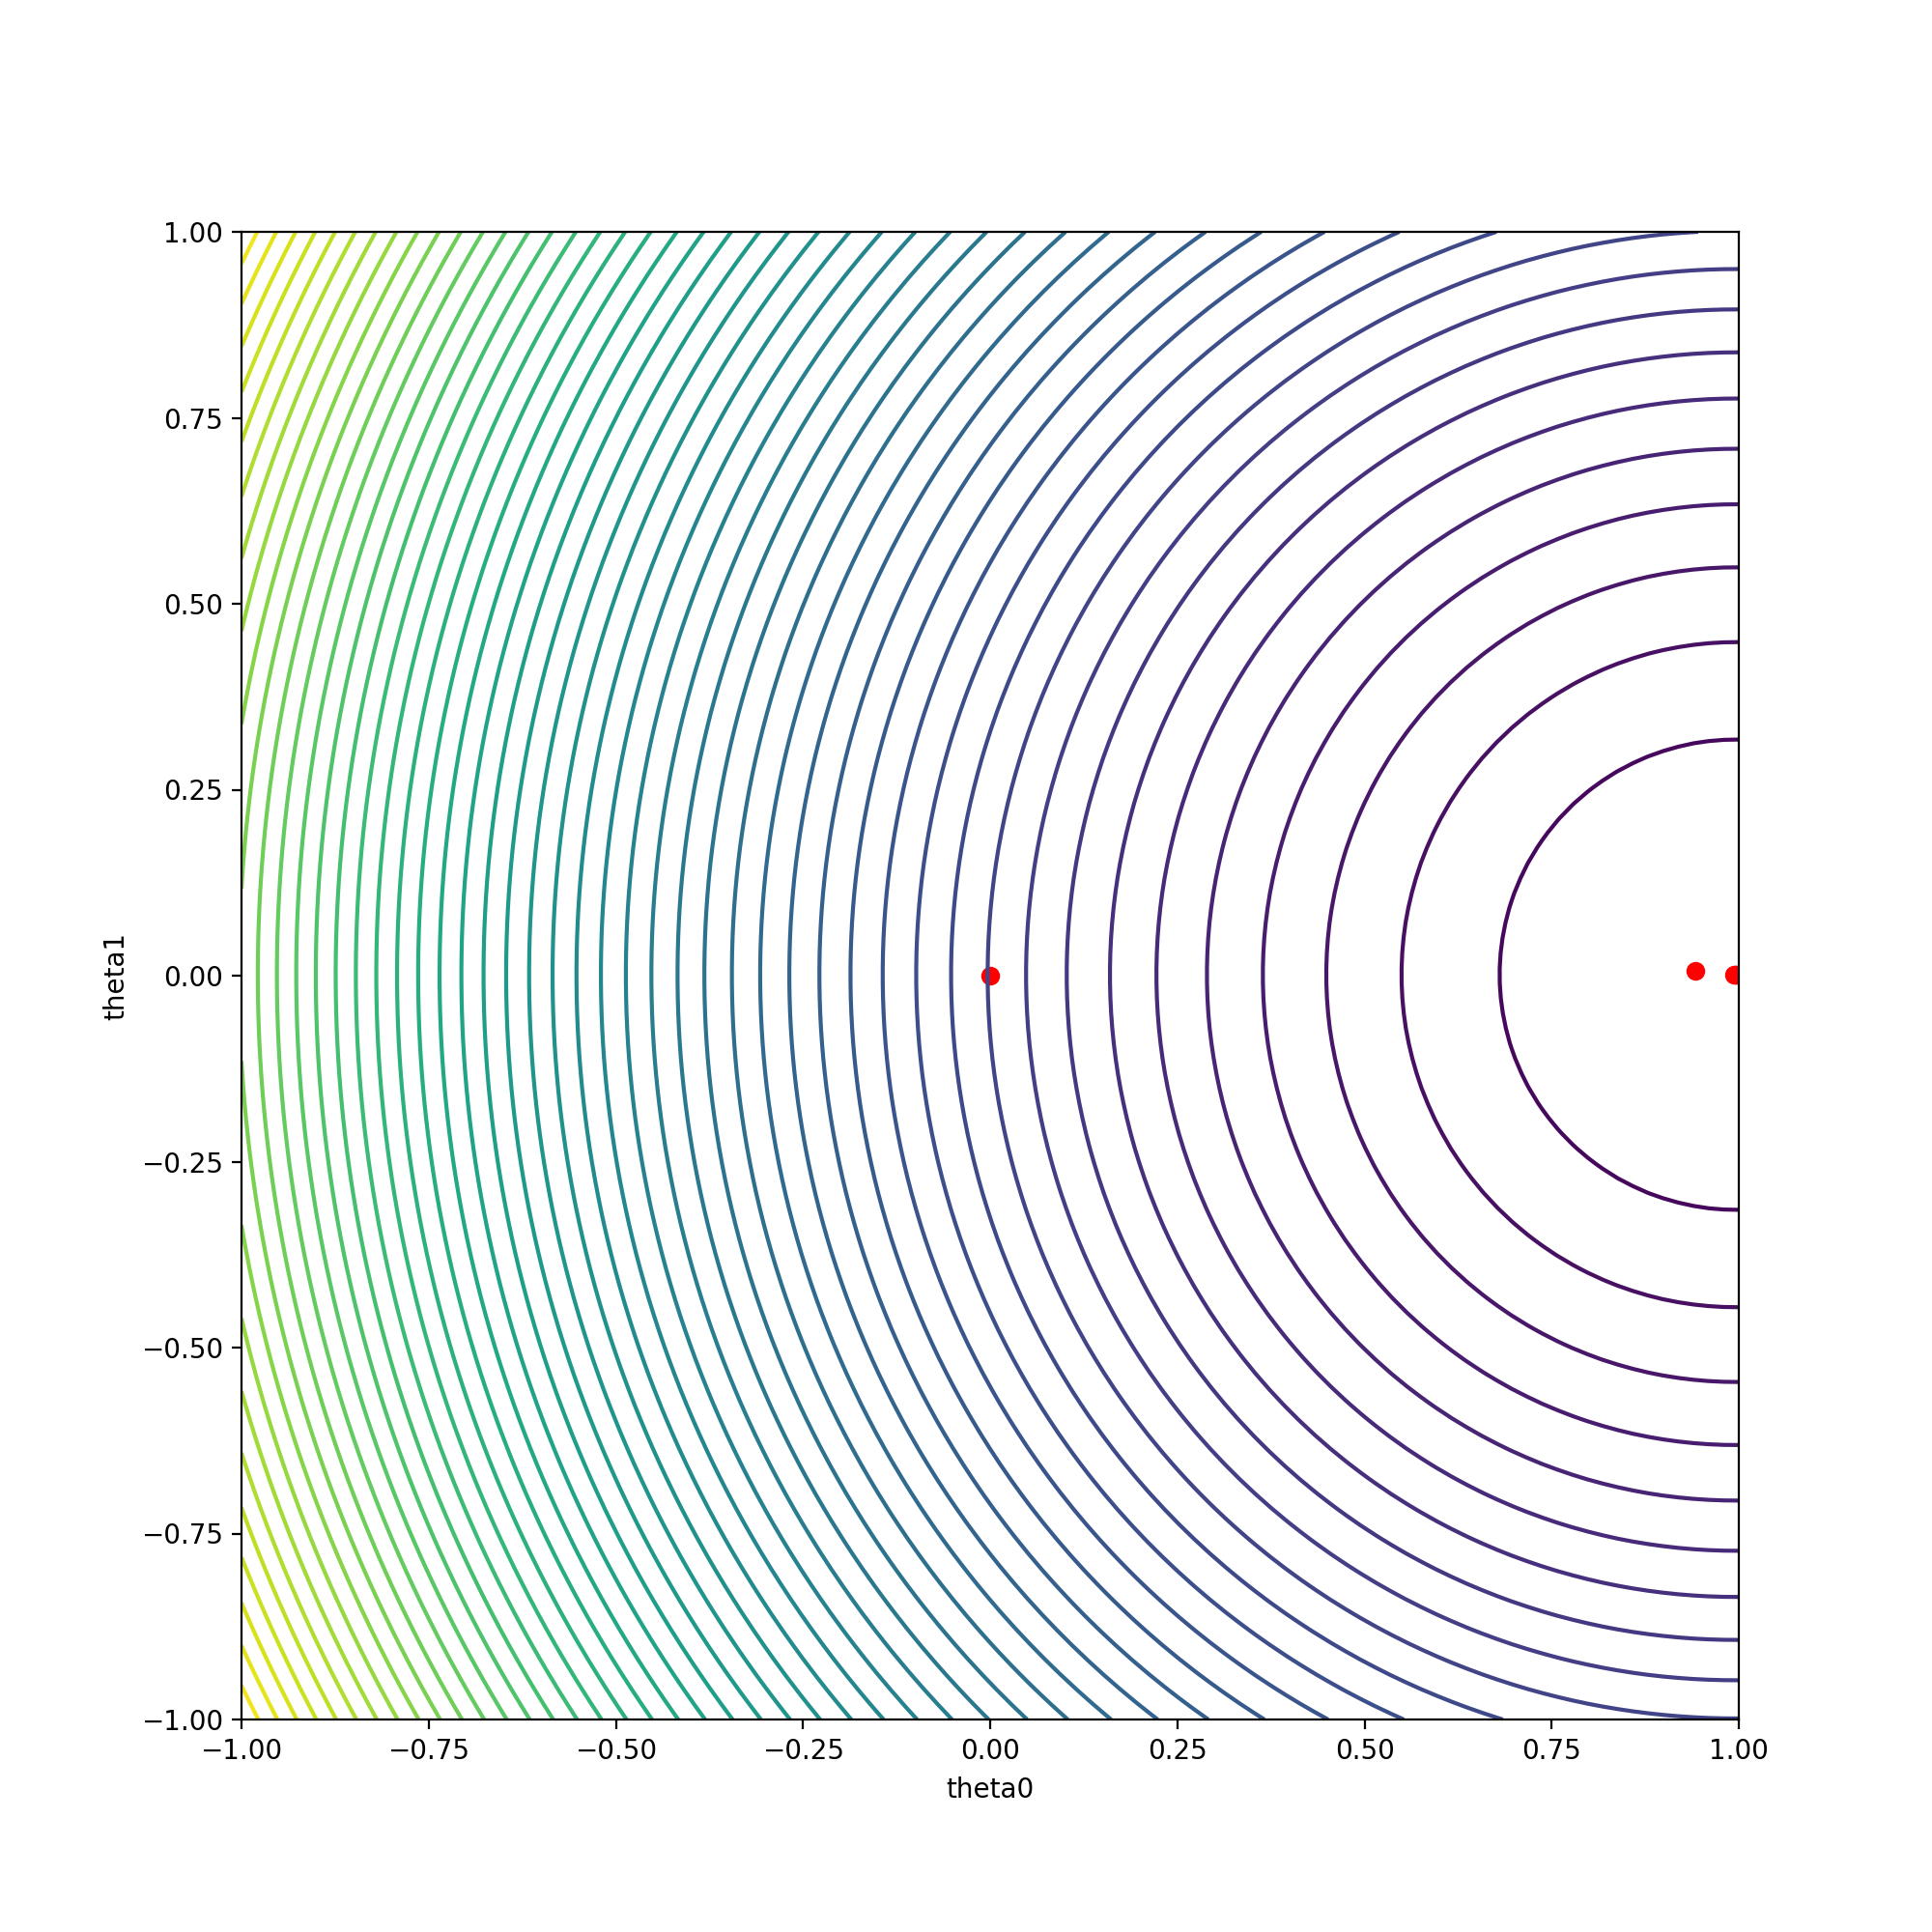

In [10]:
# evenly spaced sequence in a specified interval
X_axis = np.linspace(-1,1,100)
Y_axis = np.linspace(-1,1,100)

X1, Y1 = np.meshgrid(X_axis, Y_axis)

Z1 = np.asmatrix(np.zeros((100,100),dtype=float))

for i in range(100):
    for j in range(100):
        Z1[i,j]=find_J_theta(X_normal, Y_normal,[[X1[i][j]],[Y1[i][j]]])

Z1 = np.array(Z1)

th0 = np.zeros((len(lst_theta),1),dtype=float)

for i in range(len(lst_theta)):
    th0[i,0]=lst_theta[i][0]

    
th1 = np.zeros((len(lst_theta),1),dtype=float)
for i in range(len(lst_theta)):
    th1[i,0]=lst_theta[i][1]

    
plt.figure(figsize=(10,10))


plt.contour(Y1, X1, Z1, 50)

plt.xlabel('theta0')
plt.ylabel('theta1')

plot3d.set_title("2D contours showing the error function at each iteration")


plt.ion()  
for i in range(th0.shape[0]):
    plt.scatter(th1[i], th0[i], color="r")
    plt.draw()
    plt.show()
    plt.pause(0.2)
plt.ioff()

plt.savefig('output/Ques1(d).png')

